In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn import model_selection

In [10]:
names=['x','y','class']
df=pd.read_csv('https://raw.githubusercontent.com/enesulusoy/machineLearning-AI/584c99c1be6a55c5d082280ed691aba0eea3aaab/Makine%20Ogrenimi%204-KNNRegresyon/demo_data/3.concertriccir2.csv',delimiter=',',header=None,names=names)
print(df.head())
x=np.array(df.iloc[:,0:4])
y=np.array(df['class'])

          x         y  class
0  0.700335 -0.247068    0.0
1 -3.950019  2.740080    1.0
2  0.150222 -2.157638    1.0
3 -1.672050 -0.941519    1.0
4  2.560483 -1.846577    1.0


###  Simple Cross Validation

In [13]:
x_1,x_test,y_1,y_test = model_selection.train_test_split(x,y,test_size=0.3,random_state=0)
x_tr,x_cv,y_tr,y_cv=model_selection.train_test_split(x_1,y_1,test_size=0.3)
for i in range(1,30,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_tr,y_tr)
    pred=knn.predict(x_cv)
    acc=accuracy_score(y_cv,pred,normalize=True)*float(100)
    print('\nCV accuracy for k=%d id %d%%'%(i,acc))
    
knn=KNeighborsClassifier(1)
knn.fit(x_tr,y_tr)
pred=knn.predict(x_test)
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print('\nTest accuracy for k=1 is %d%%'%(acc))


CV accuracy for k=1 id 100%

CV accuracy for k=3 id 100%

CV accuracy for k=5 id 100%

CV accuracy for k=7 id 100%

CV accuracy for k=9 id 99%

CV accuracy for k=11 id 98%

CV accuracy for k=13 id 98%

CV accuracy for k=15 id 98%

CV accuracy for k=17 id 98%

CV accuracy for k=19 id 98%

CV accuracy for k=21 id 97%

CV accuracy for k=23 id 94%

CV accuracy for k=25 id 93%

CV accuracy for k=27 id 91%

CV accuracy for k=29 id 91%

Test accuracy for k=1 is 100%


### 10Fold cross validation

the number of neighbors is 1


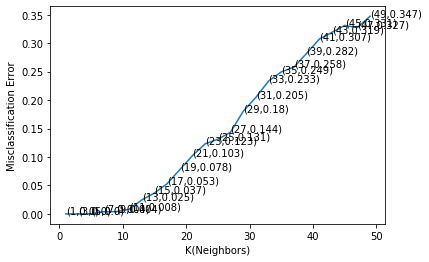

Miclassification Error is:  [0.    0.    0.    0.004 0.004 0.008 0.025 0.037 0.053 0.078 0.103 0.123
 0.131 0.144 0.18  0.205 0.233 0.249 0.258 0.282 0.307 0.319 0.331 0.327
 0.347]


In [15]:
List =list(range(0,50))
neighbors=list(filter(lambda x:x%2!=0, List))

cv_scores=[]
for k in neighbors:
    knn=KNeighborsClassifier(n_neighbors=k)
    scores=cross_val_score(knn,x_tr,y_tr,cv=10,scoring='accuracy')
    cv_scores.append(scores.mean())
MSE=[1-x for x in cv_scores]

optimal_k=neighbors[MSE.index(min(MSE))]
print('the number of neighbors is %d'% optimal_k)
plt.plot(neighbors,MSE)

for xy in zip(neighbors,np.round(MSE,3)):
    plt.annotate('(%s,%s)'%xy,xy=xy,textcoords='data')
    
plt.xlabel('K(Neighbors)')
plt.ylabel('Misclassification Error')
plt.show()

print('Miclassification Error is: ',np.round(MSE, 3))

In [19]:
knn_optimal=KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(x_tr,y_tr)
pred=knn_optimal.predict(x_test)
acc=accuracy_score(y_test,pred,normalize=True)*float(100)
print("Accuracy on test data with optimal K = %d is %f%%" %(optimal_k,acc))

Accuracy on test data with optimal K = 1 is 100.000000%
